In [2]:
from sympy import *
import pickle
init_printing(use_unicode=True)

In [3]:
# Carregar o bloco simbólico do arquivo .pkl
with open('blocos_calculados.pkl', 'rb') as arquivo:
    blocos_calculados = pickle.load(arquivo)

with open('matrizes_BS.pkl', 'rb') as arquivo:
    matrizes_BS = pickle.load(arquivo)

with open('matrizes_SA.pkl', 'rb') as arquivo:
    matrizes_SA = pickle.load(arquivo)

In [4]:
bloco1 = blocos_calculados['bloco1_matrizBS']
bloco2 = blocos_calculados['bloco2_matrizBS']
matrizDesconhecida0 = matrizes_BS['matrizDesconhecida0']
similarity = matrizes_BS['similarity']
sAlfa0 = matrizes_SA['matriz_SA']

# Definição dos contadores pertinentes aos índices da matriz $S\alpha^0$

In [11]:
def contador_maluco_variaveis(indice, elemento):
    p1 = [11, 27, 35, 51]
    p3 = [2, 18, 30, 42, 58]
    if elemento in p1:
        indice = 1
    elif elemento in p3:
        indice = 3
    else: 
        indice = 2
    return indice

def contador_maluco_zeros(indice, elemento):
    p1 = [3, 19, 31, 43, 59]
    p3 = [10, 26, 34, 50]
    if elemento in p1:
        indice = 1
    elif elemento in p3:
        indice = 3
    else: 
        indice = 2
    return indice

def progressao_indices_zeros(n, funcao):
    a1 = 1
    termos = [a1]
    for i in range(0, n):
            razao = contador_maluco_zeros(i, a1)
            a1 += razao
            termos.append(a1)
    return termos

def progressao_indices_variaveis(n, funcao):
    a1 = 0
    termos = [a1]
    for i in range(0, n):
            razao = contador_maluco_variaveis(i, a1)
            a1 += razao
            termos.append(a1)
    return termos
    
sequencia_variaveis = progressao_indices_variaveis(31, contador_maluco_variaveis)
sequencia_zeros = progressao_indices_zeros(31, contador_maluco_zeros)

sequencia_zeros
sequencia_variaveis

# Substituições

## Matriz de Similaridade

In [12]:
for i in range(len(sequencia_variaveis)):
    similarity[0, sequencia_variaveis[i]] = 0
    similarity[63, sequencia_variaveis[i]] = 0
    
for j in range(len(sequencia_variaveis)):
    for i in range(2,7):
        similarity[i, sequencia_variaveis[j]] = 0

for j in range(len(sequencia_variaveis)):
    for i in range(13, 24):
        similarity[i, sequencia_variaveis[j]] = 0
        
for i in range(len(sequencia_zeros)):
    for j in range(23, 28):
        similarity[j , sequencia_zeros[i]]= 0

for i in range(len(sequencia_zeros)):
    for j in range(7, 13):
        similarity[j , sequencia_zeros[i]]= 0

for i in range(len(sequencia_zeros)):
    similarity[1 , sequencia_zeros[i]]= 0

for i in range(len(sequencia_variaveis)):
    similarity[28, sequencia_variaveis[i]] = 0

In [13]:
similarity_fixed_1 = similarity

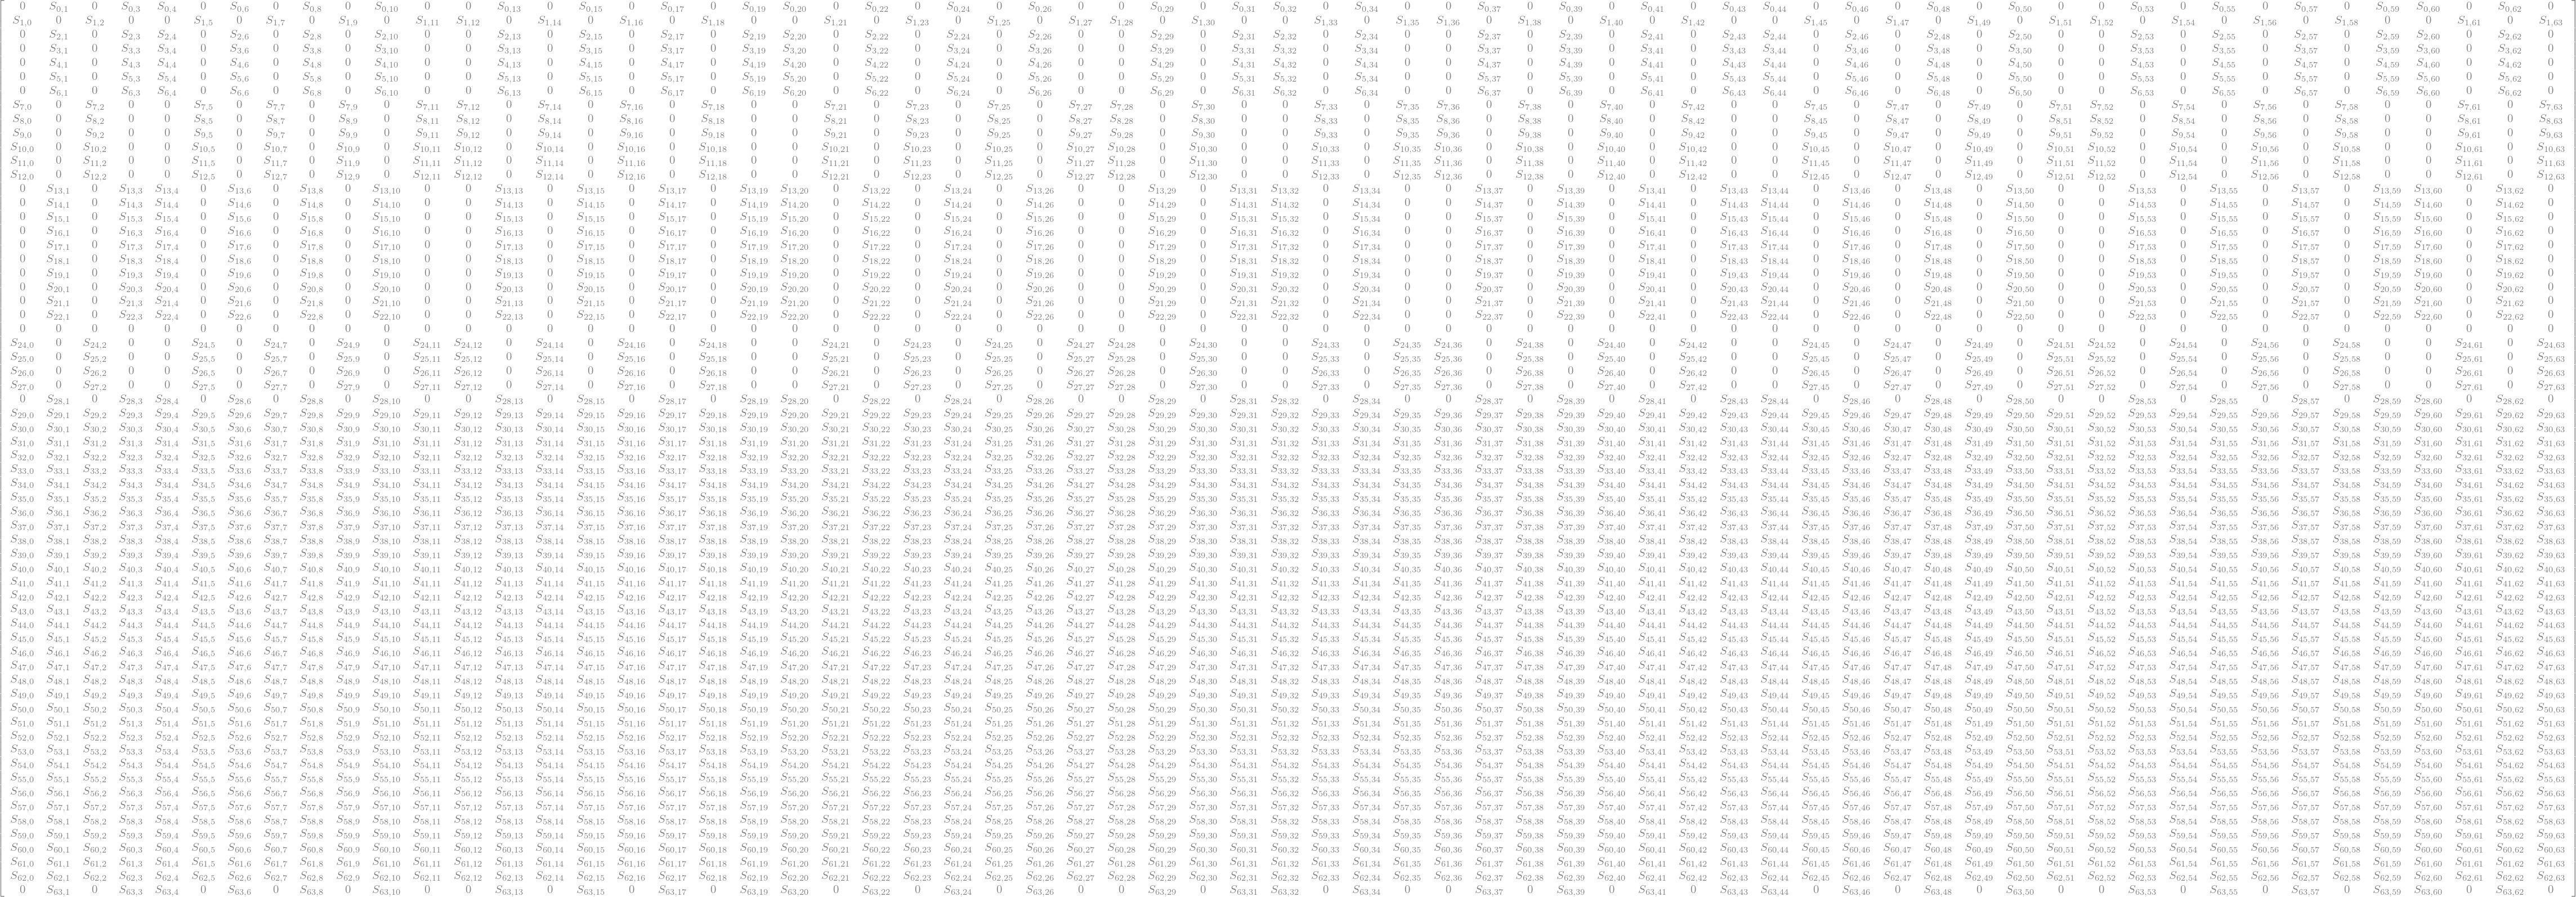

In [14]:
similarity_fixed_1

## Matriz skew-vectorial

In [8]:
# Os elementos da diagonal PROVAVELMENTE são 0.

for i in range(34):
    matrizDesconhecida0[i, i] = 0

In [9]:
matrizDesconhecida0_fixed_1 = matrizDesconhecida0

# Armazenando localmente as matrizes fixed

In [15]:
matrizes_fixed = {
    'similarity_fixed_1': similarity_fixed_1,
    'matrizDesconhecida0_fixed_1': matrizDesconhecida0_fixed_1,
}

with open('matrizes_fixed.pkl', 'wb') as arquivo:
    pickle.dump(matrizes_fixed, arquivo)